### Importing Libraries

In [1]:
#Libraries for data manipulation
import numpy as np
import pandas as pd
import re

#Libraries for graph plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for ML Classification
from sklearn import metrics
import matplotlib.dates as mdates
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
PATH = "/content/Occupancy_Estimation.csv"
df = pd.read_csv(PATH)

In [3]:
df.shape

(10129, 19)

In [4]:
df.describe().T

count        mean         std         min         25%  \
S1_Temp               10129.0   25.454012    0.351351   24.940000   25.190000   
S2_Temp               10129.0   25.546059    0.586325   24.750000   25.190000   
S3_Temp               10129.0   25.056621    0.427283   24.440000   24.690000   
S4_Temp               10129.0   25.754125    0.356434   24.940000   25.440000   
S1_Light              10129.0   25.445059   51.011264    0.000000    0.000000   
S2_Light              10129.0   26.016290   67.304170    0.000000    0.000000   
S3_Light              10129.0   34.248494   58.400744    0.000000    0.000000   
S4_Light              10129.0   13.220259   19.602219    0.000000    0.000000   
S1_Sound              10129.0    0.168178    0.316709    0.060000    0.070000   
S2_Sound              10129.0    0.120066    0.266503    0.040000    0.050000   
S3_Sound              10129.0    0.158119    0.413637    0.040000    0.060000   
S4_Sound              10129.0    0.103840    0.120683    0.050000    0.060000   
S5_CO2                10129.0  460.860401  199.964940  345.000000  355.000000   
S5_CO2_Slope          10129.0   -0.004830    1.164990   -6.296154   -0.046154   
S6_PIR                10129.0    0.090137    0.286392    0.000000    0.000000   
S7_PIR                10129.0    0.079574    0.270645    0.000000    0.000000   
Room_Occupancy_Count  10129.0    0.398559    0.893633    0.000000    0.000000   

                         50%     75%          max  
S1_Temp                25.38   25.63    26.380000  
S2_Temp                25.38   25.63    29.000000  
S3_Temp                24.94   25.38    26.190000  
S4_Temp                25.75   26.00    26.560000  
S1_Light                0.00   12.00   165.000000  
S2_Light                0.00   14.00   258.000000  
S3_Light                0.00   50.00   280.000000  
S4_Light                0.00   22.00    74.000000  
S1_Sound                0.08    0.08     3.880000  
S2_Sound                0.05    0.06     3.440000  
S3_Sound                0.06    0.07     3.670000  
S4_Sound                0.08    0.10     3.400000  
S5_CO2                360.00  465.00  1270.000000  
S5_CO2_Slope            0.00    0.00     8.980769  
S6_PIR                  0.00    0.00     1.000000  
S7_PIR                  0.00    0.00     1.000000  
Room_Occupancy_Count    0.00    0.00     3.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [6]:
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

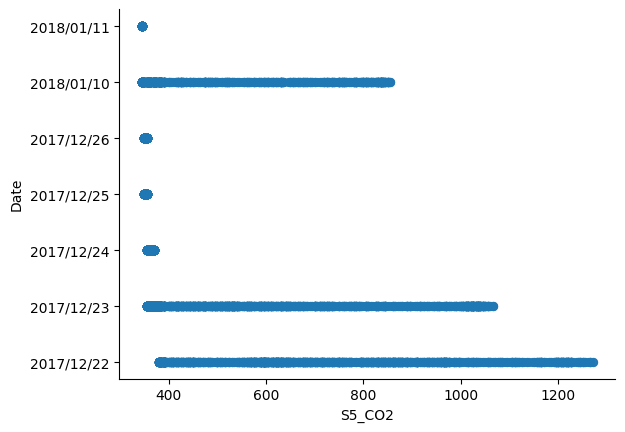

In [7]:
df.plot(kind='scatter', x='S5_CO2', y='Date', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

<ipython-input-9-515c6db0a5ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

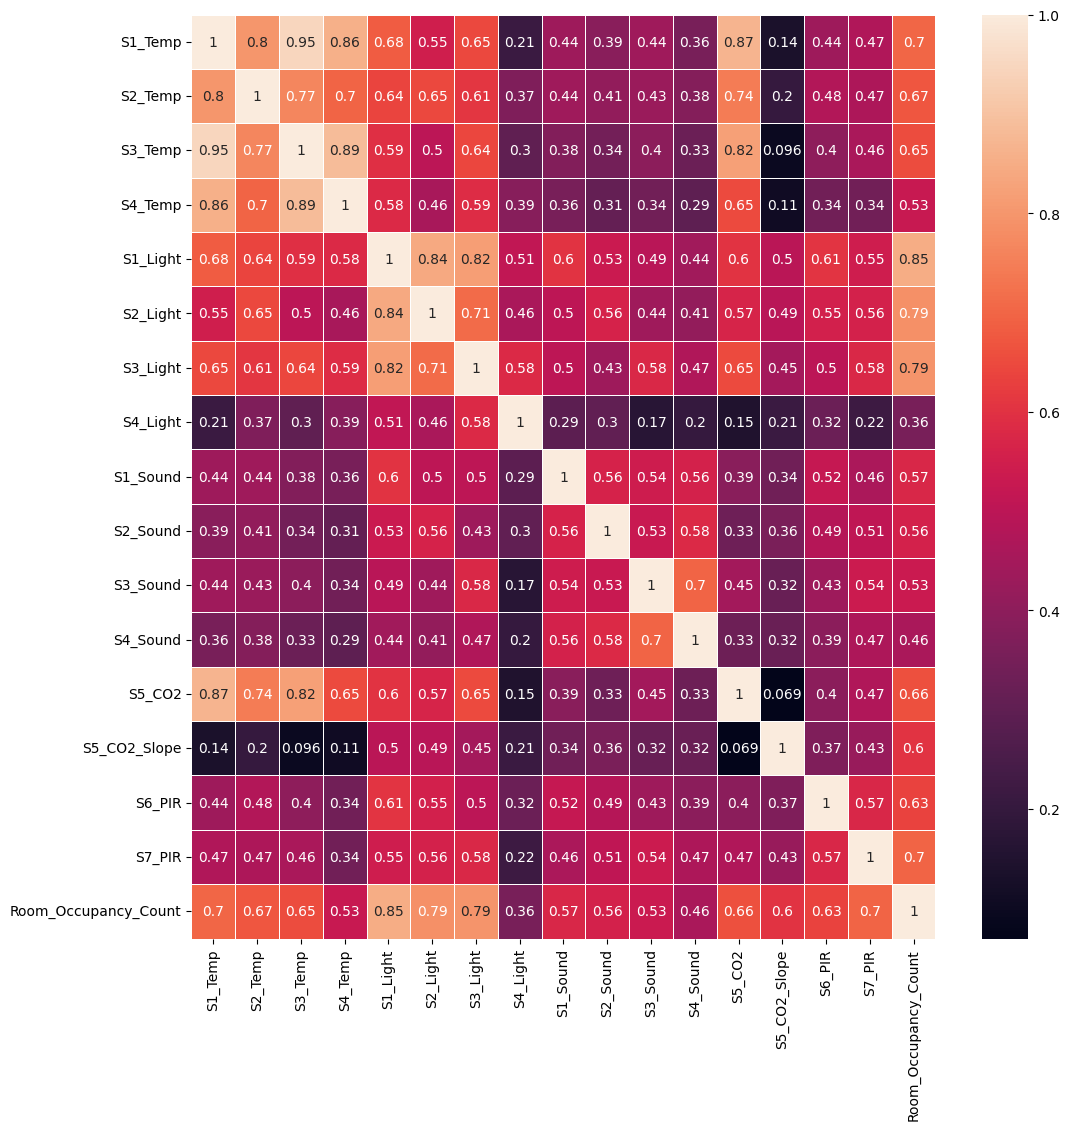

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, ax=ax)


**DATA VISUALIZATION**

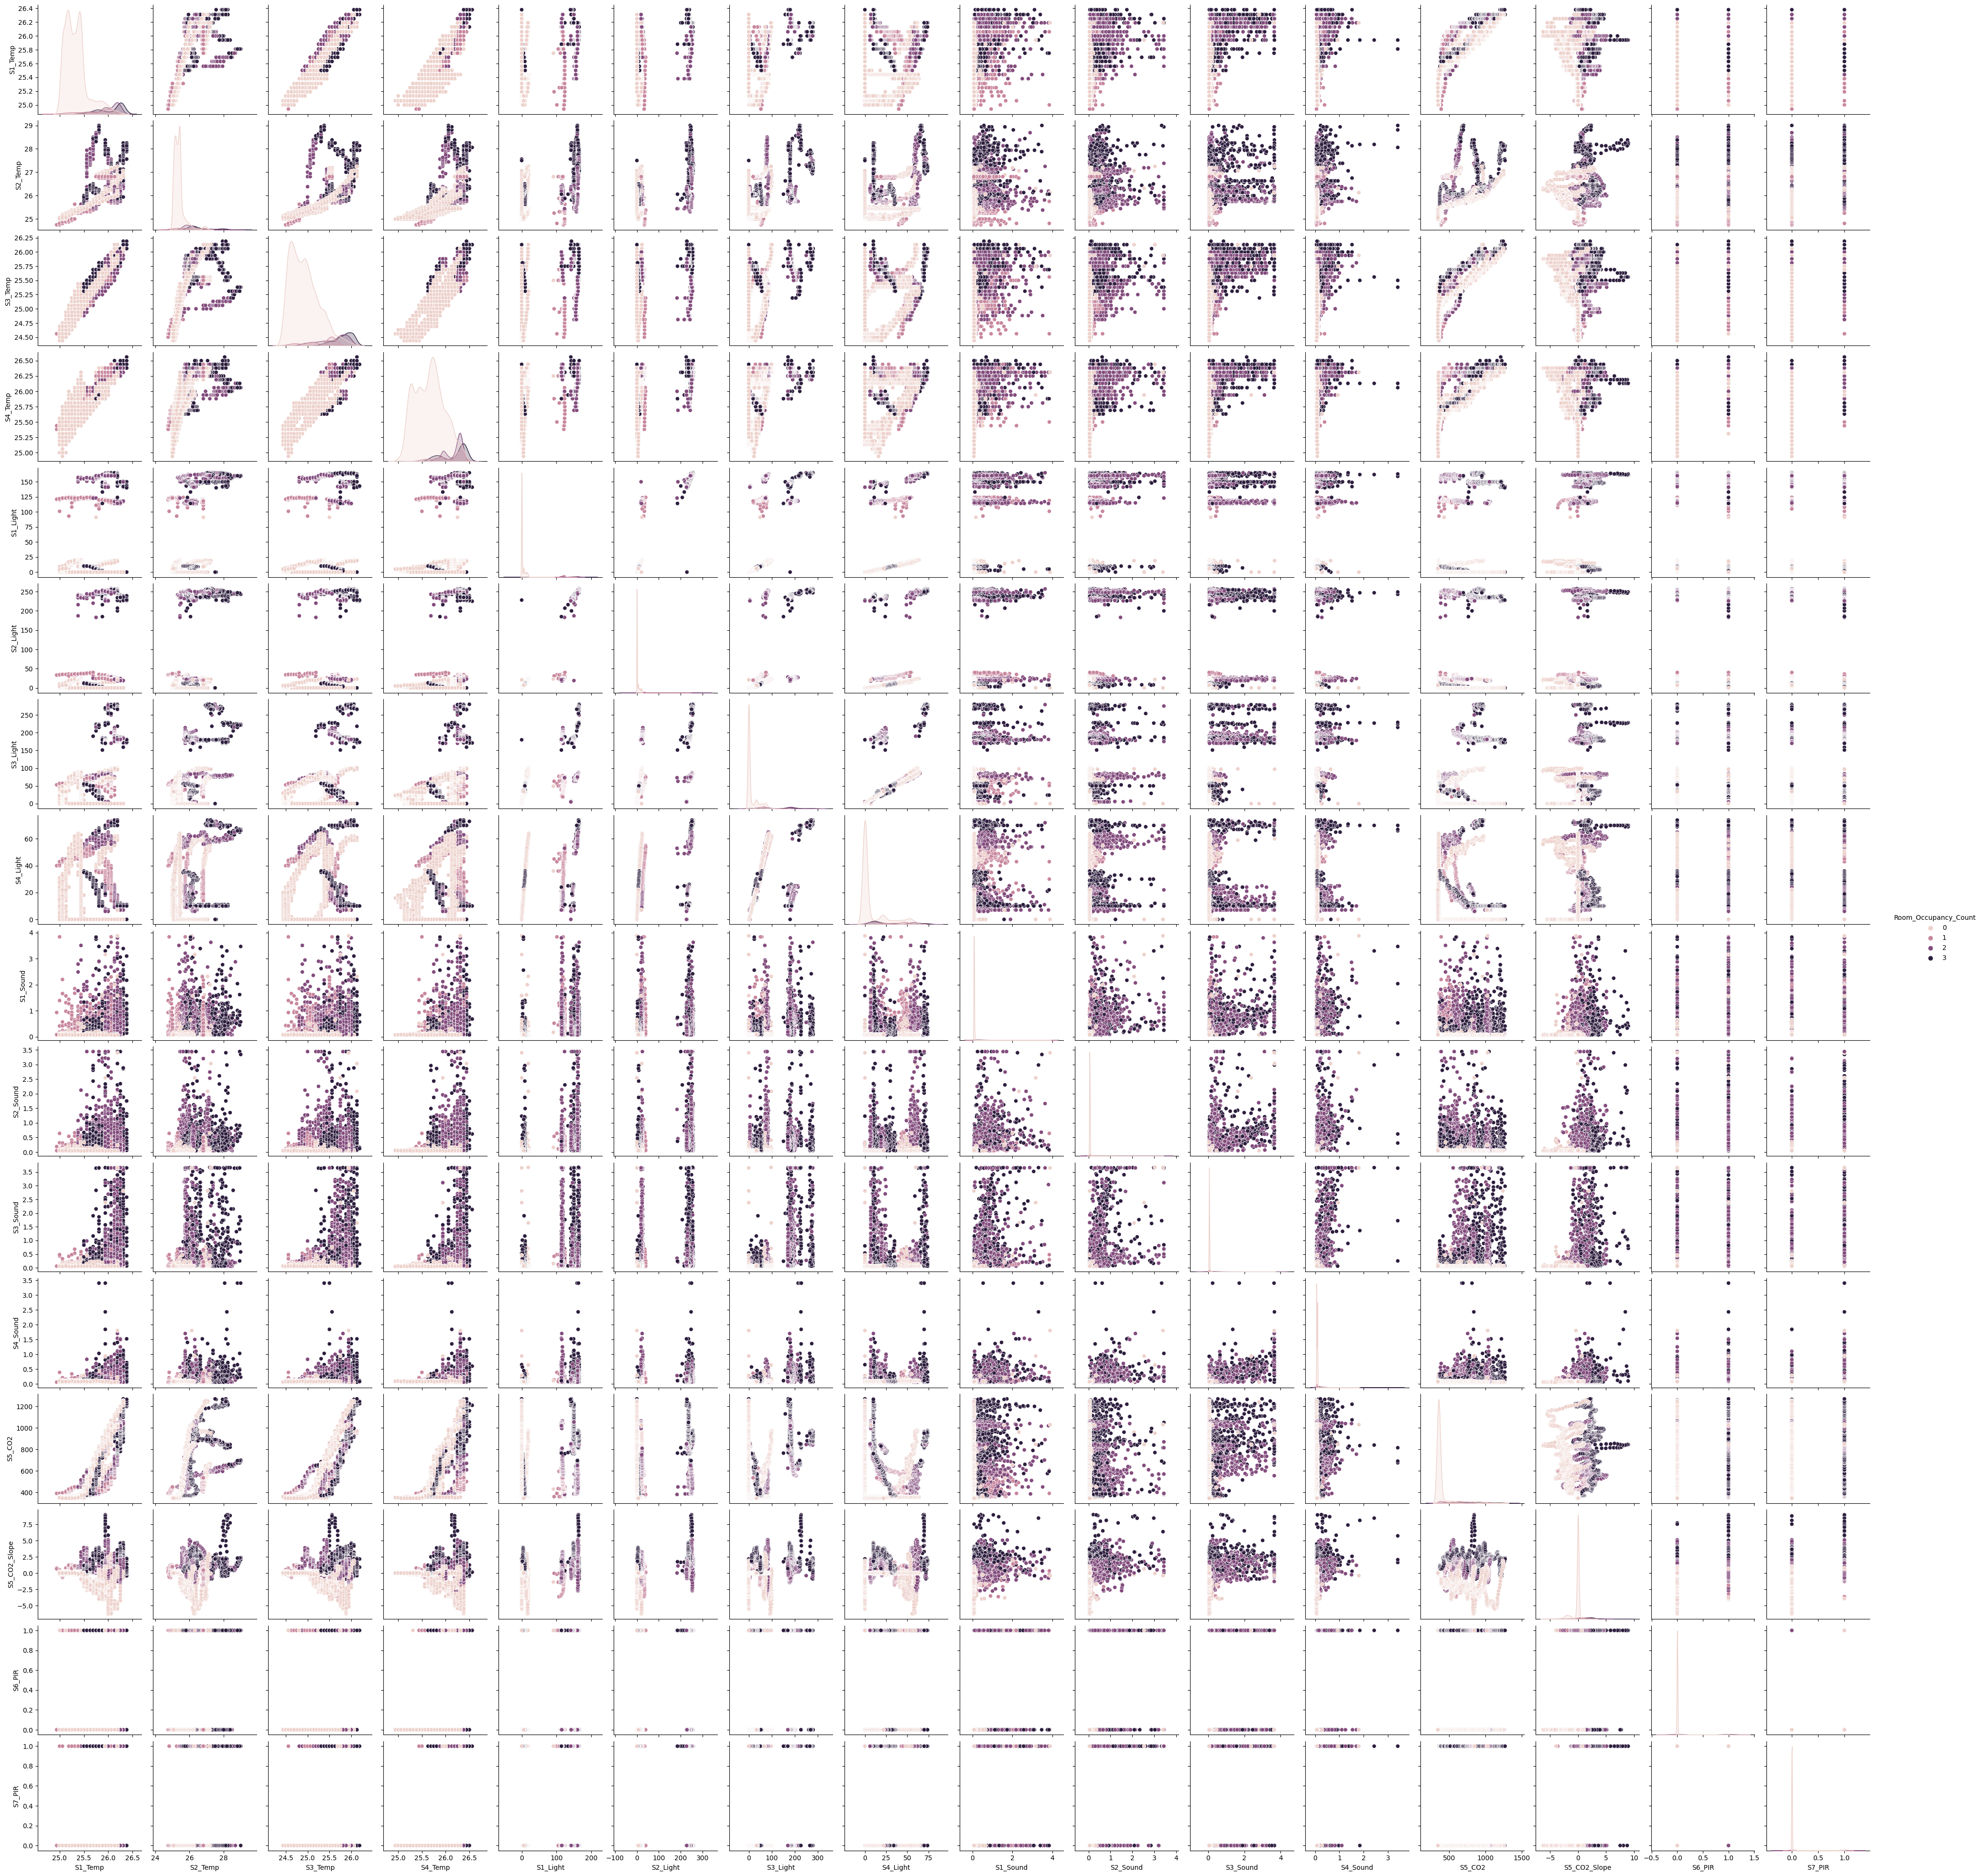

In [10]:
sns.pairplot(df, hue = 'Room_Occupancy_Count')
plt.show()

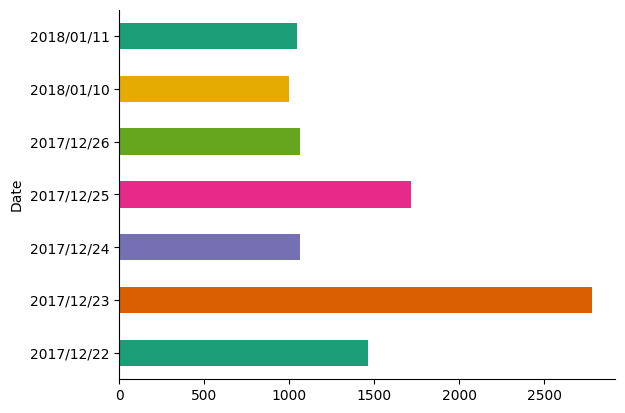

In [11]:
df.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

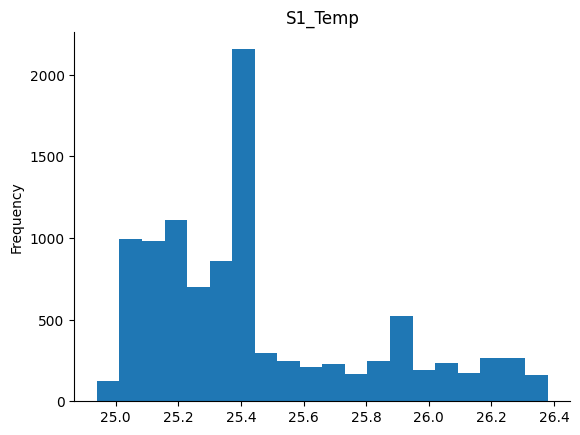

In [12]:
df['S1_Temp'].plot(kind='hist', bins=20, title='S1_Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

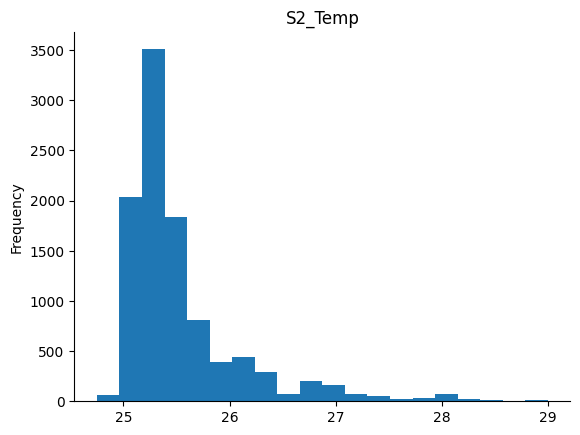

In [13]:
df['S2_Temp'].plot(kind='hist', bins=20, title='S2_Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

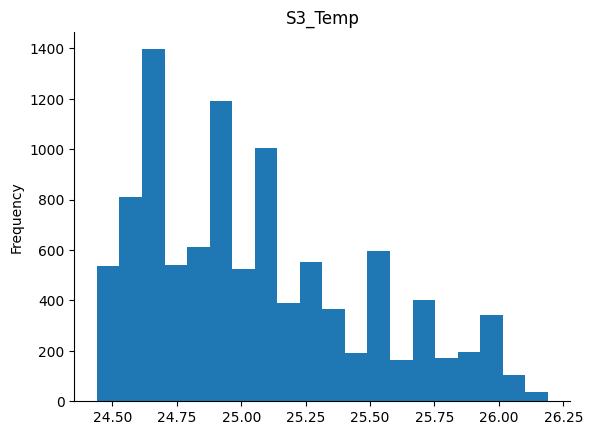

In [14]:
df['S3_Temp'].plot(kind='hist', bins=20, title='S3_Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

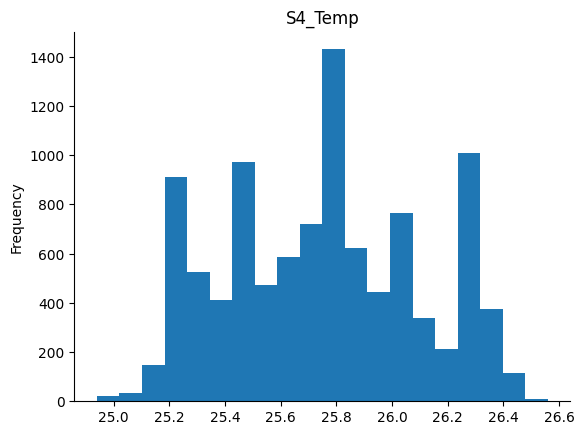

In [15]:
df['S4_Temp'].plot(kind='hist', bins=20, title='S4_Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Comparison of Average Sound observed by sensors')

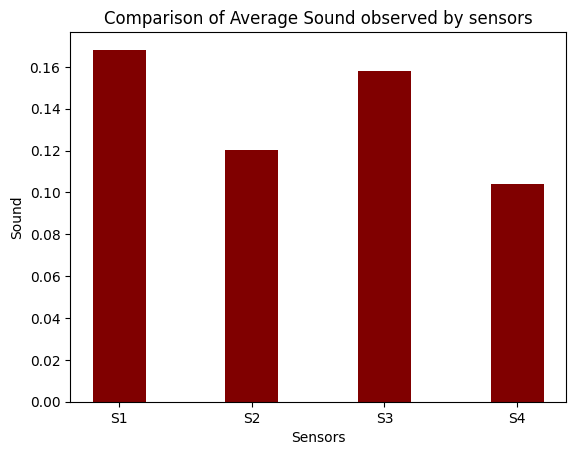

In [52]:
x = ["S1", "S2", "S3", "S4"]
y = [df.S1_Sound.mean(), df.S2_Sound.mean(), df.S3_Sound.mean(), df.S4_Sound.mean()]

plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("Sensors")
plt.ylabel("Sound")
plt.title("Comparison of Average Sound observed by sensors")

Text(0.5, 1.0, 'Comparison of average luminousity observed by sensors')

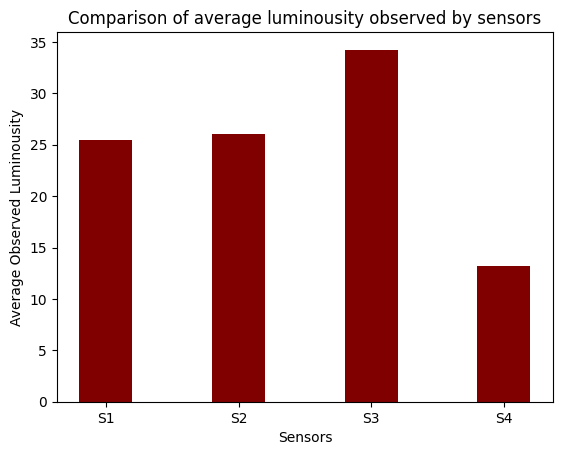

In [16]:
x = ["S1", "S2", "S3", "S4"]
y = [df.S1_Light.mean(), df.S2_Light.mean(), df.S3_Light.mean(), df.S4_Light.mean()]

plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("Sensors")
plt.ylabel("Average Observed Luminousity")
plt.title("Comparison of average luminousity observed by sensors")

Text(0.5, 1.0, 'Comparison of Averarage Temperatures observed by sensors')

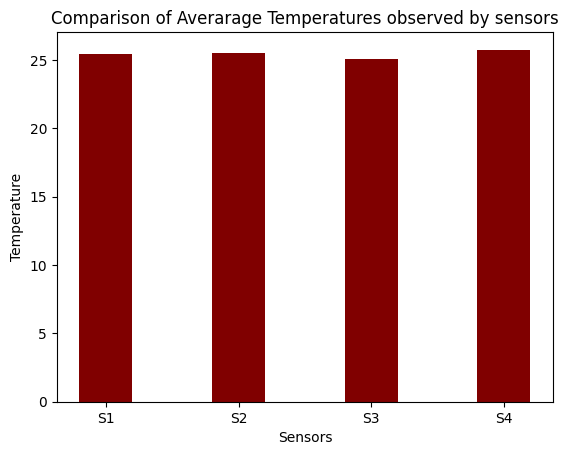

In [17]:
x = ["S1", "S2", "S3", "S4"]
y = [df.S1_Temp.mean(), df.S2_Temp.mean(), df.S3_Temp.mean(), df.S4_Temp.mean()]

plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("Sensors")
plt.ylabel("Temperature")
plt.title("Comparison of Averarage Temperatures observed by sensors")

In [18]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [19]:
time = df['Time'].values
temp1  = df['S1_Temp'].values
temp2  = df['S2_Temp'].values
temp3  = df['S3_Temp'].values
temp4  = df['S4_Temp'].values

Text(0.5, 1.0, 'Data Time Series Temperature')

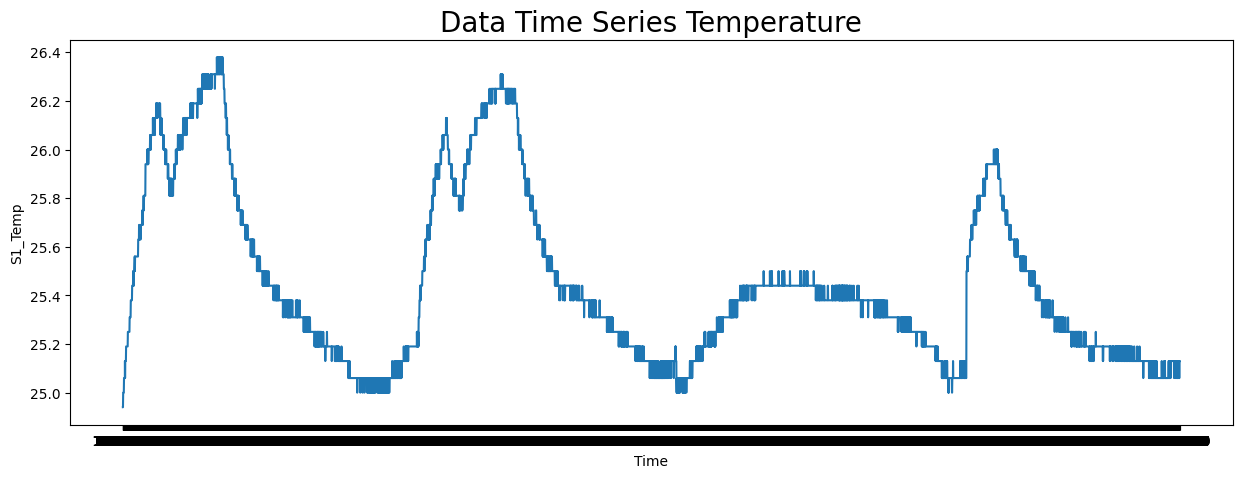

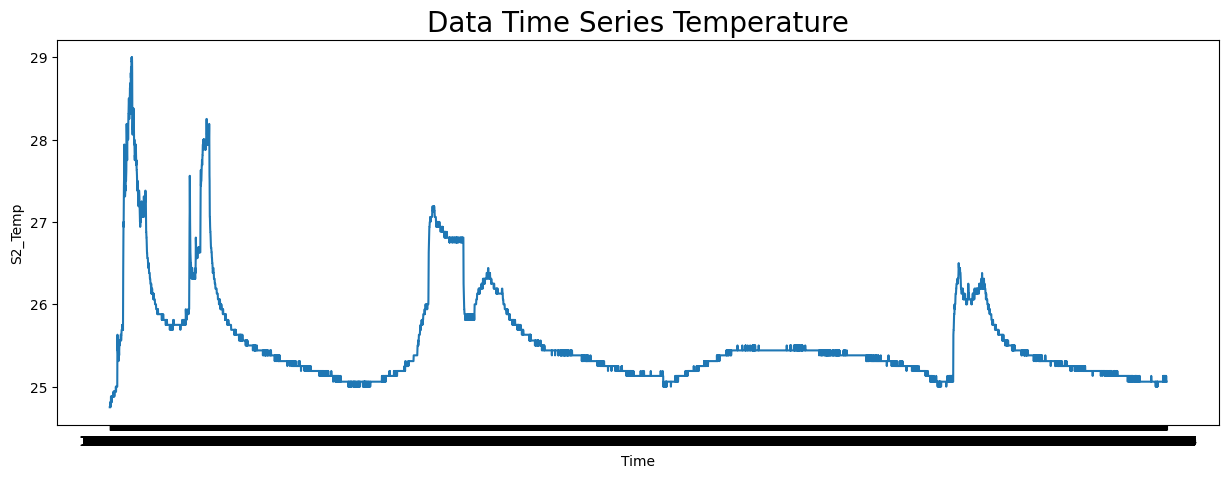

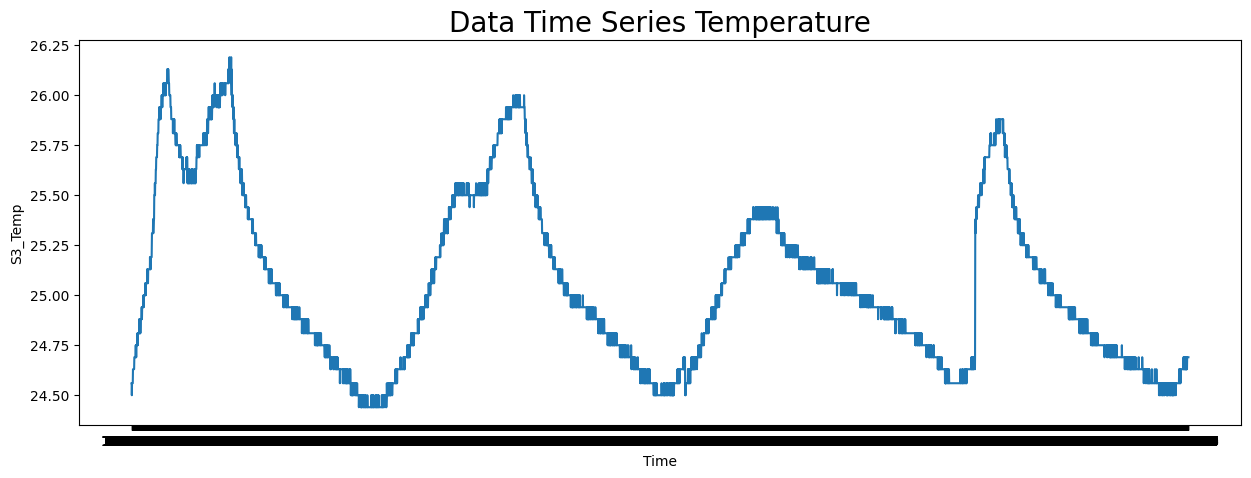

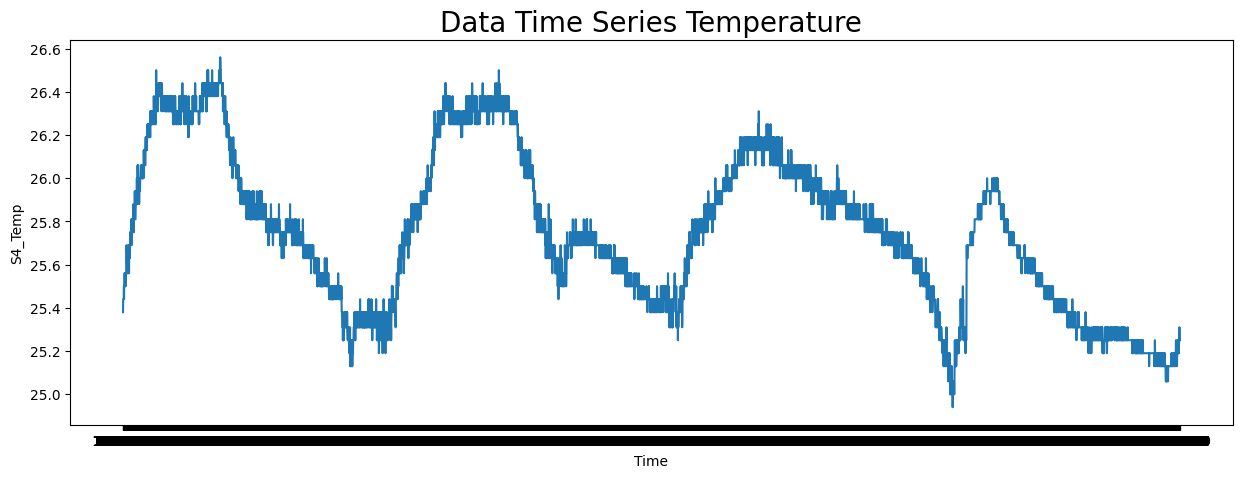

In [20]:
plt.figure(figsize=(15,5))
plt.plot(time, temp1)
plt.xlabel('Time')
plt.ylabel('S1_Temp')
plt.title('Data Time Series Temperature', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, temp2)
plt.xlabel('Time')
plt.ylabel('S2_Temp')
plt.title('Data Time Series Temperature', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, temp3)
plt.xlabel('Time')
plt.ylabel('S3_Temp')
plt.title('Data Time Series Temperature', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, temp4)
plt.xlabel('Time')
plt.ylabel('S4_Temp')
plt.title('Data Time Series Temperature', fontsize=20)

In [23]:
light1  = df['S1_Light'].values
light2  = df['S2_Light'].values
light3  = df['S3_Light'].values
light4  = df['S4_Light'].values

Text(0.5, 1.0, 'Data Time Series Light')

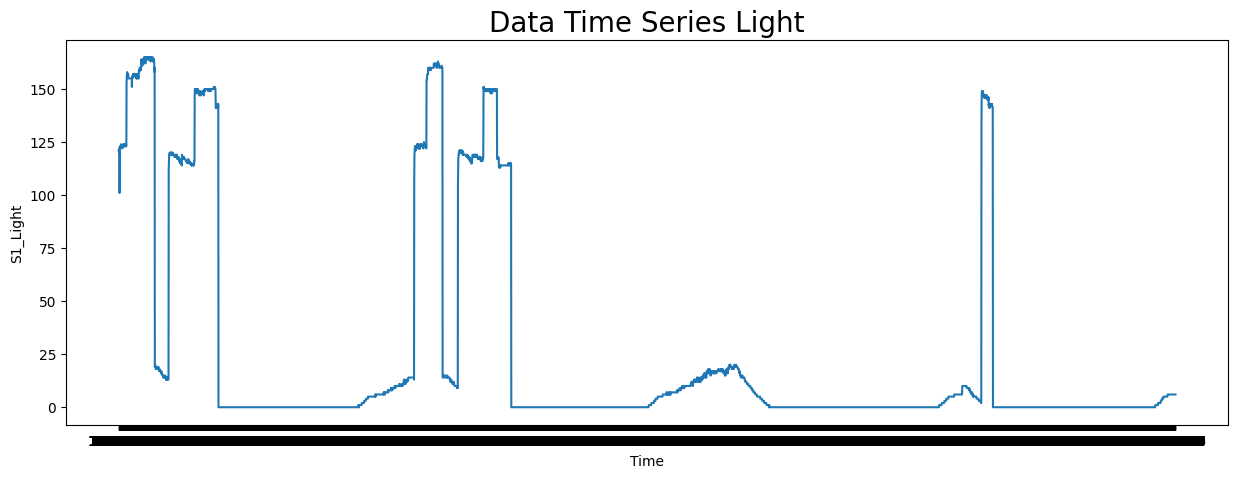

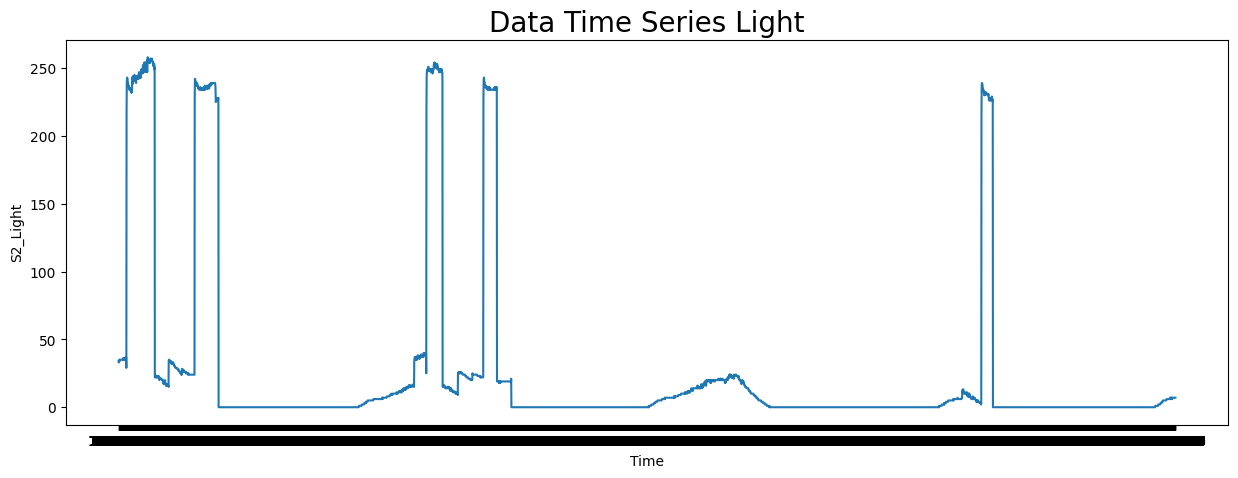

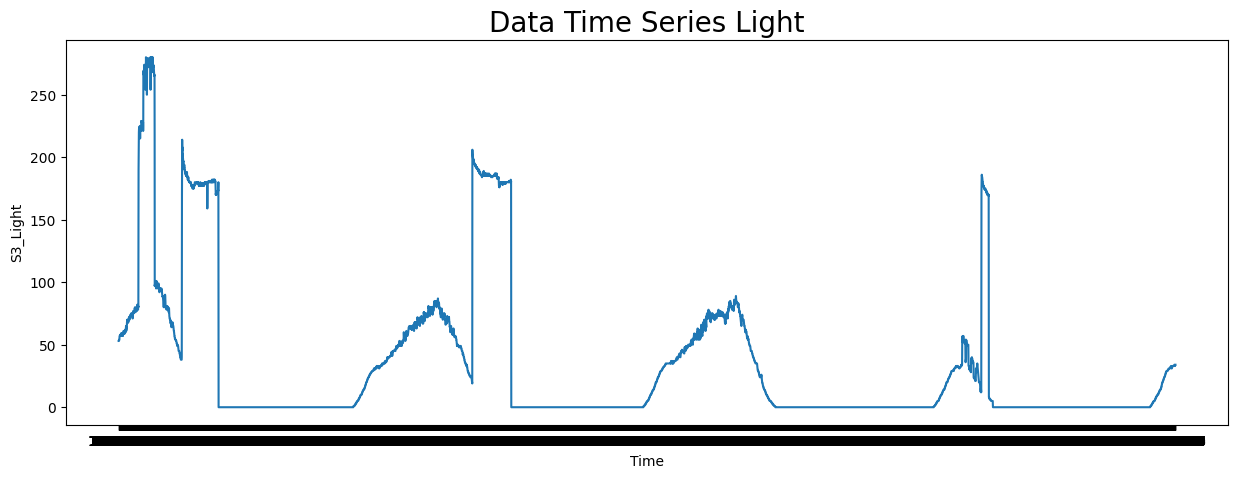

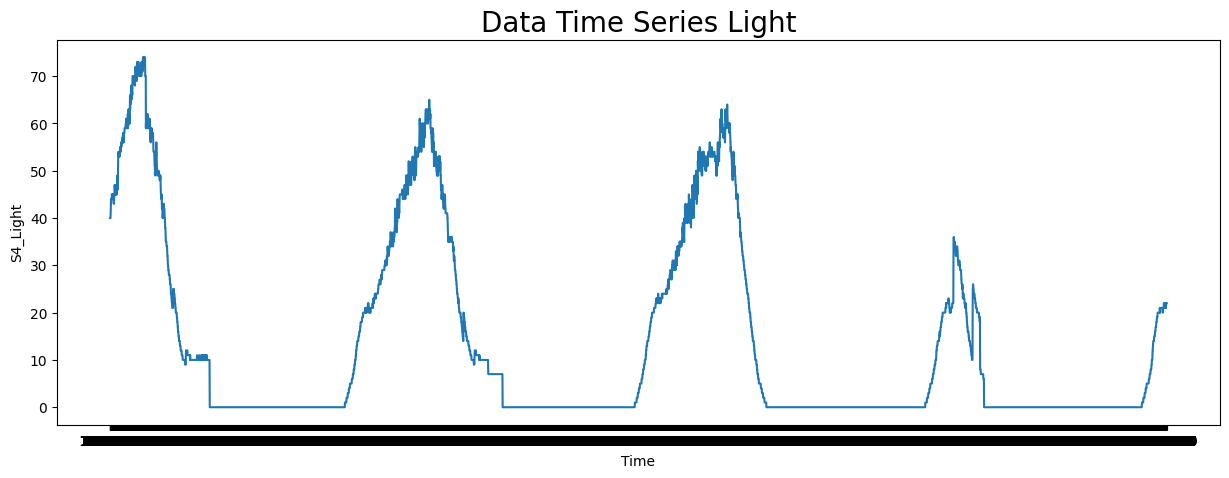

In [24]:
plt.figure(figsize=(15,5))
plt.plot(time, light1)
plt.xlabel('Time')
plt.ylabel('S1_Light')
plt.title('Data Time Series Light', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, light2)
plt.xlabel('Time')
plt.ylabel('S2_Light')
plt.title('Data Time Series Light', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, light3)
plt.xlabel('Time')
plt.ylabel('S3_Light')
plt.title('Data Time Series Light', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, light4)
plt.xlabel('Time')
plt.ylabel('S4_Light')
plt.title('Data Time Series Light', fontsize=20)

In [25]:
Sound1  = df['S1_Sound'].values
Sound2  = df['S2_Sound'].values
Sound3  = df['S3_Sound'].values
Sound4  = df['S4_Sound'].values

Text(0.5, 1.0, 'Data Time Series Sound')

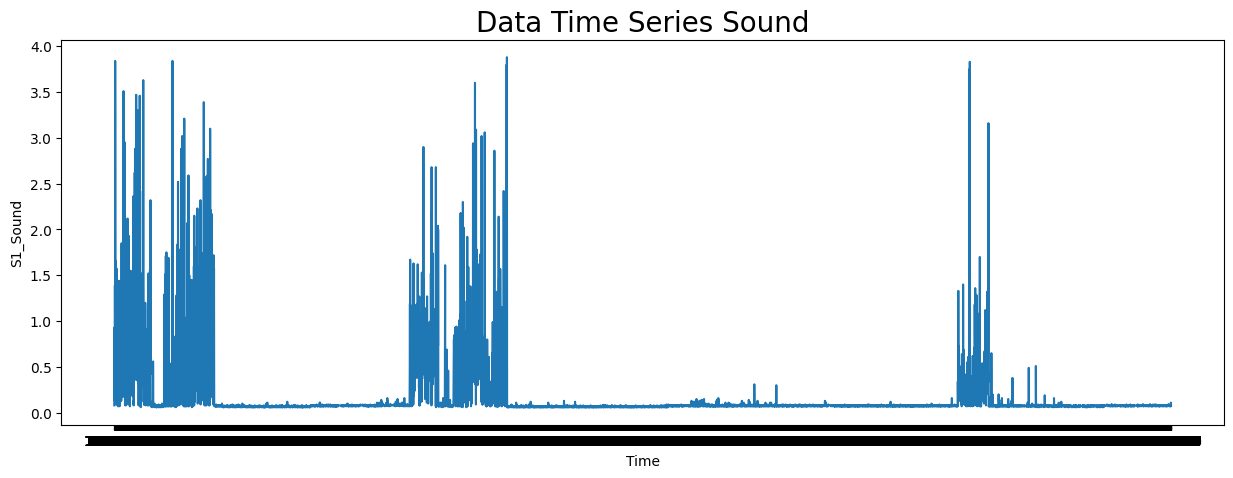

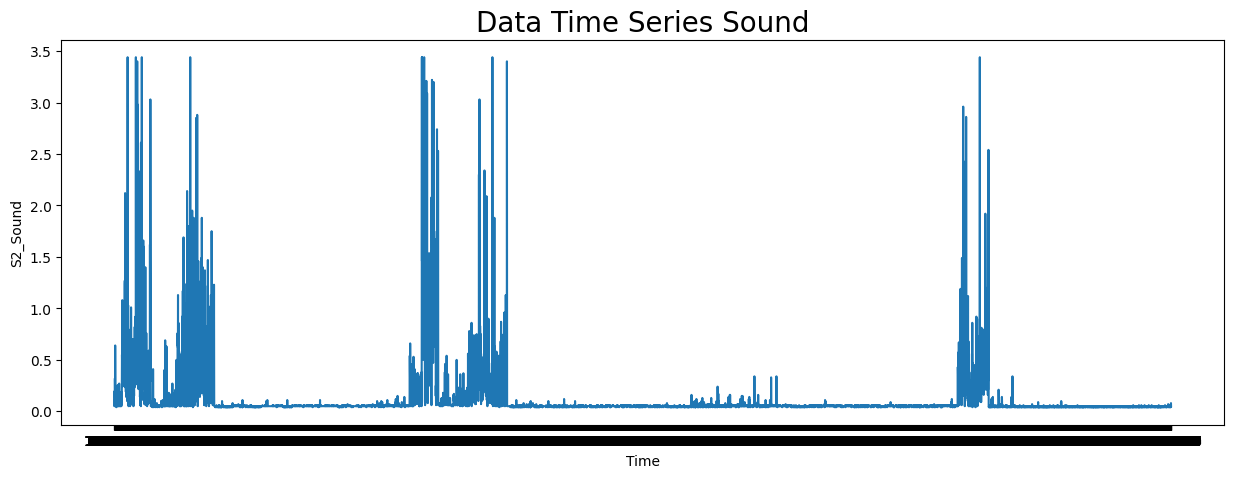

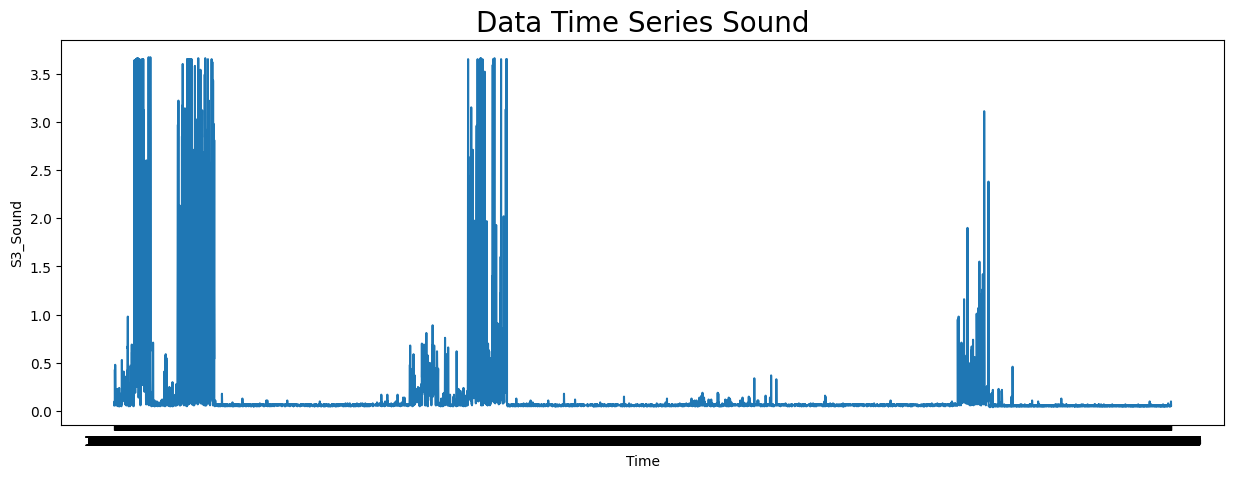

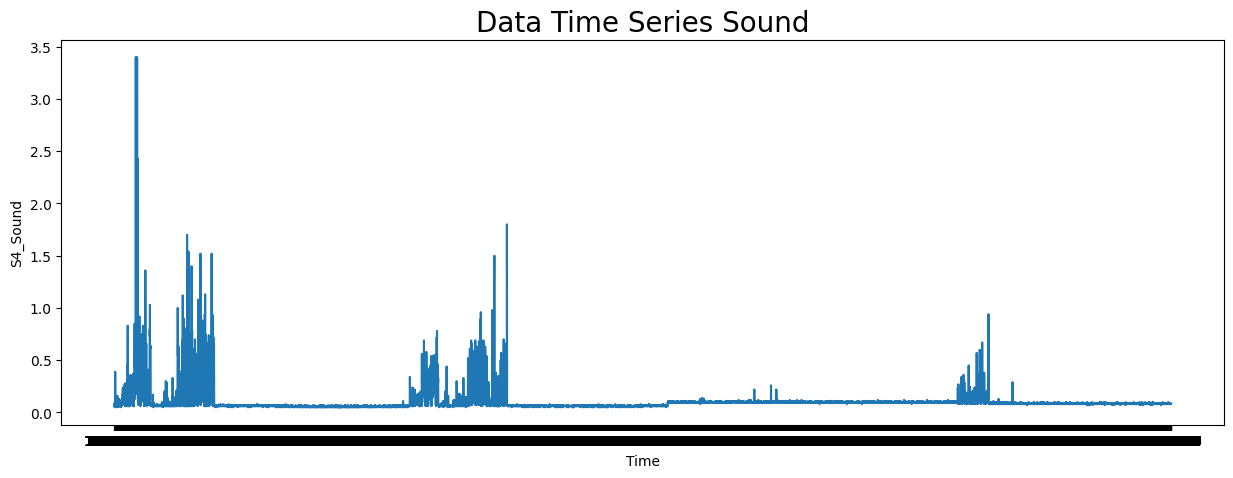

In [26]:
plt.figure(figsize=(15,5))
plt.plot(time, Sound1)
plt.xlabel('Time')
plt.ylabel('S1_Sound')
plt.title('Data Time Series Sound', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, Sound2)
plt.xlabel('Time')
plt.ylabel('S2_Sound')
plt.title('Data Time Series Sound', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, Sound3)
plt.xlabel('Time')
plt.ylabel('S3_Sound')
plt.title('Data Time Series Sound', fontsize=20)
plt.figure(figsize=(15,5))
plt.plot(time, Sound4)
plt.xlabel('Time')
plt.ylabel('S4_Sound')
plt.title('Data Time Series Sound', fontsize=20)

Text(0.5, 1.0, 'Comparison of Average Sound observed by sensors')

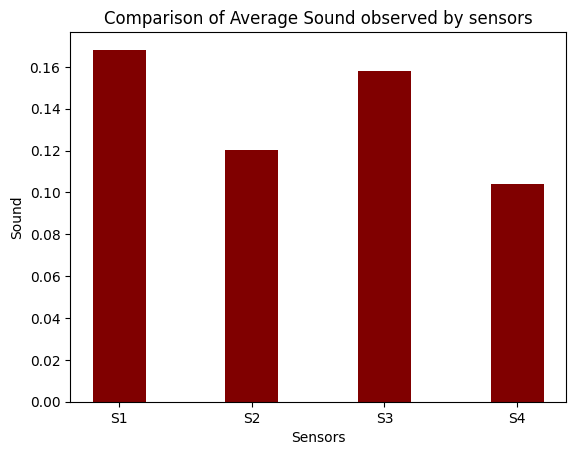

In [27]:
x = ["S1", "S2", "S3", "S4"]
y = [df.S1_Sound.mean(), df.S2_Sound.mean(), df.S3_Sound.mean(), df.S4_Sound.mean()]

plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("Sensors")
plt.ylabel("Sound")
plt.title("Comparison of Average Sound observed by sensors")

In [28]:
df.drop('Time', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

In [29]:
X = df.drop(['Room_Occupancy_Count'], axis=1)
y = df.loc[:,['Room_Occupancy_Count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (8103, 19)
Shape of X_test:  (2026, 19)
Shape of y_train:  (8103, 1)
Shape of y_test (2026, 1)


In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [31]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 96.89042448173741


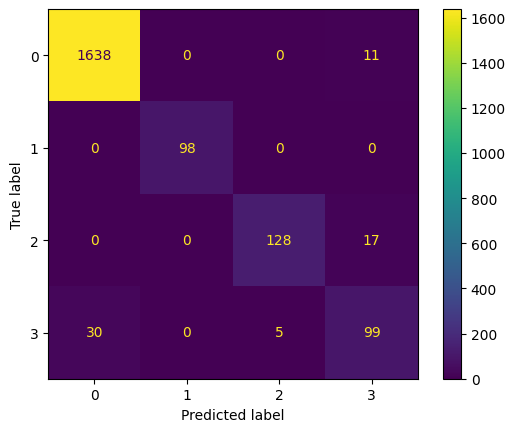

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()

In [33]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.982     0.993     0.988      1649
           1      1.000     1.000     1.000        98
           2      0.962     0.883     0.921       145
           3      0.780     0.739     0.759       134

    accuracy                          0.969      2026
   macro avg      0.931     0.904     0.917      2026
weighted avg      0.968     0.969     0.968      2026



In [50]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [51]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 99.60513326752222


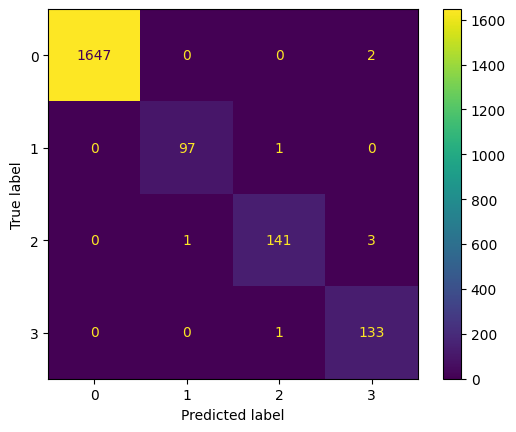

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()
plt.show()

In [37]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      1649
           1      0.990     0.990     0.990        98
           2      0.986     0.972     0.979       145
           3      0.964     0.993     0.978       134

    accuracy                          0.996      2026
   macro avg      0.985     0.988     0.987      2026
weighted avg      0.996     0.996     0.996      2026



In [38]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 95.01480750246792


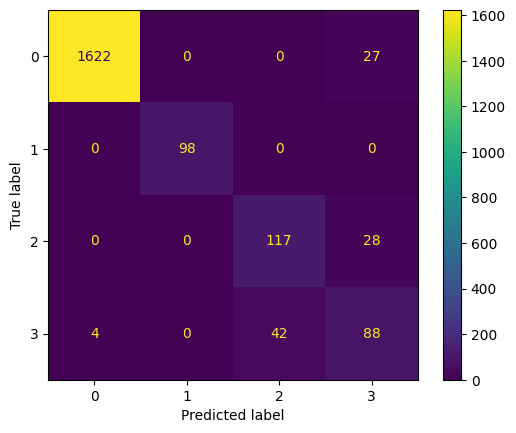

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model3.classes_)
disp.plot()
plt.show()

In [41]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.998     0.984     0.991      1649
           1      1.000     1.000     1.000        98
           2      0.736     0.807     0.770       145
           3      0.615     0.657     0.635       134

    accuracy                          0.950      2026
   macro avg      0.837     0.862     0.849      2026
weighted avg      0.954     0.950     0.952      2026



In [42]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

<ipython-input-42-30621d211b3c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, y_train)


In [43]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 99.90128331688055


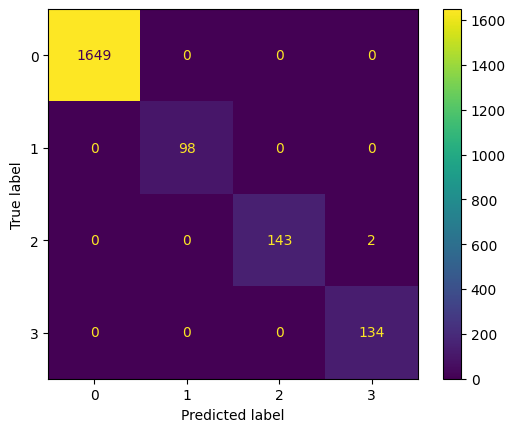

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model4.classes_)
disp.plot()
plt.show()

In [45]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1649
           1      1.000     1.000     1.000        98
           2      1.000     0.986     0.993       145
           3      0.985     1.000     0.993       134

    accuracy                          0.999      2026
   macro avg      0.996     0.997     0.996      2026
weighted avg      0.999     0.999     0.999      2026



In [46]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 97.28529121421519


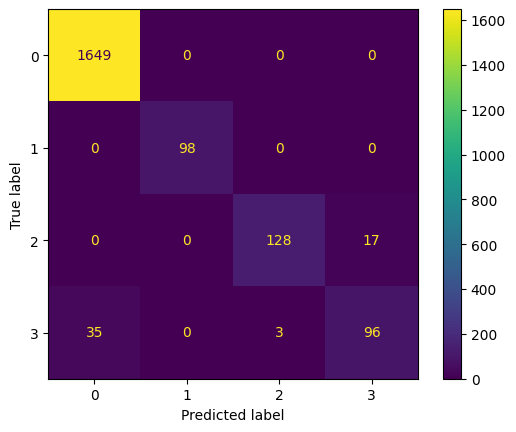

In [48]:
cm = confusion_matrix(y_test, y_pred, labels=model5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model5.classes_)
disp.plot()
plt.show()

In [49]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.979     1.000     0.989      1649
           1      1.000     1.000     1.000        98
           2      0.977     0.883     0.928       145
           3      0.850     0.716     0.777       134

    accuracy                          0.973      2026
   macro avg      0.951     0.900     0.924      2026
weighted avg      0.971     0.973     0.972      2026

